In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_NEW.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW


meg = ma.copy()
meg = meg.drop([
    'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
       'State code','Village',
       'other_assembly_constituencies'
       ], axis=1)

meg = meg.rename(columns={'state_name': 'State', 'district_name': 'District','gp_name':'GP',
                                    'sub_district_name':'Subdistrict','village_name':'Village','block_name':'Block',
                                    'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                                    'block_code':'Block_code','gp_code':'GP_code','Village code':'Village_code'
                                    })

meg = meg.dropna(subset=['total_population'])
meg = meg[meg['total_population'] != 'Nava Mota']
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)
meg['total_population'] = meg['total_population'].astype(float)


In [2]:
towns = meg[meg['total_population'] >= 5000]
vills = meg[meg['total_population'] < 5000]

In [39]:
# Calculate the mean of each column and store it in a new Series
averages = meg[[
    'total_population',
    'avg_ntl',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'availability_of_govt_degree_college',
    'availability_of_high_school',
    'availability_of_middle_school',
    'availability_of_primary_school',
    'availability_of_ssc_school',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_aanganwadi_centre_available',
    'is_veterinary_hospital_available',
    'availability_of_market',
    'availability_of_panchayat_bhawan',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_bank_available',
    'is_post_office_available',
    'is_village_connected_to_all_weather_road'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,avg_ntl,availability_of_govt_degree_college,availability_of_high_school,availability_of_middle_school,availability_of_primary_school,availability_of_ssc_school,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,availability_of_mother_child_health_facilities,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_market,availability_of_panchayat_bhawan,availability_of_public_transport,availability_of_railway_station,is_bank_available,is_post_office_available,is_village_connected_to_all_weather_road
count,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000,514095.00000
mean,1853.83970,38.06045,0.03188,0.20106,0.42870,0.81895,0.12200,0.12753,0.06638,0.33685,0.83064,0.11700,0.10544,0.45415,0.37883,0.02995,0.12747,0.24406,0.71952
std,3011.42569,108.09774,0.17568,0.40079,0.49489,0.38506,0.32728,0.33357,0.24895,0.47263,0.37507,0.32142,0.30711,0.49789,0.48510,0.17044,0.33350,0.42953,0.44923
min,1.00000,0.28600,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,510.00000,12.02900,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1081.00000,21.50300,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,2137.00000,40.22900,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,99989.00000,22220.42200,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [38]:
# Calculate the mean of each column and store it in a new Series
averages = vills[[
    'total_population','avg_ntl',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'availability_of_govt_degree_college',
    'availability_of_high_school',
    'availability_of_middle_school',
    'availability_of_primary_school',
    'availability_of_ssc_school',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_aanganwadi_centre_available',
    'is_veterinary_hospital_available',
    'availability_of_market',
    'availability_of_panchayat_bhawan',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_bank_available',
    'is_post_office_available',
    'is_village_connected_to_all_weather_road'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,avg_ntl,availability_of_govt_degree_college,availability_of_high_school,availability_of_middle_school,availability_of_primary_school,availability_of_ssc_school,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,availability_of_mother_child_health_facilities,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_market,availability_of_panchayat_bhawan,availability_of_public_transport,availability_of_railway_station,is_bank_available,is_post_office_available,is_village_connected_to_all_weather_road
count,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000,479994.00000
mean,1304.64099,33.37810,0.02520,0.17203,0.40276,0.80859,0.09872,0.11072,0.05755,0.32052,0.82146,0.09965,0.09180,0.43213,0.36743,0.02566,0.09701,0.21115,0.71117
std,1096.13553,86.88557,0.15673,0.37741,0.49045,0.39341,0.29828,0.31378,0.23289,0.46668,0.38297,0.29953,0.28875,0.49537,0.48211,0.15811,0.29597,0.40812,0.45322
min,1.00000,0.28600,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,480.00000,11.55300,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,992.00000,20.20100,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,1840.00000,36.18675,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,4999.00000,18296.25400,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Subdist Level -  Towns vs Villages

## Towns

In [5]:
mer_sub = towns.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','SubDistrict Area':'mean'}).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road'})
mer_sub['subdist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(towns, mer_sub, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']
mer_all_sub

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share
0,21,ODISHA,354,GANJAM,3079,DHARAKOTE,3371,DHARAKOTE,117714,JAHADA,411301,Jahada,761107.00000,273.00000,2227.00000,5250.00000,2525.00000,2725.00000,1350.00000,1150.00000,200.00000,0,1,0,1,2500.00000,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1150.00000,1,1,0,1,1,1,1,528.00000,16.00000,1,1,0,0.00000,0,0,1,1,1,1,1,482.00000,482.00000,200.00000,200.00000,0.00000,0.00000,0.00000,0.00000,600.00000,20.00000,250.00000,1,1,600.00000,600.00000,DHARAKOTE,4.37192,6.73600,81.11400,7.73300,37.02800,5.49700,8,3,5,1,1,4,0.00705,50.02600,16380.00000,9,7,4,6,1,81.11400,0.00305,0.32051
1,21,ODISHA,354,GANJAM,3079,DHARAKOTE,3371,DHARAKOTE,117722,SARADHAPUR,411343,Bariguda,761114.00000,273.00000,2223.00000,11130.00000,539.00000,591.00000,259.00000,210.00000,49.00000,0,0,0,1,83.67000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,200.00000,1,1,0,0,0,1,1,302.00000,8.00000,0,0,0,5.00000,0,0,0,1,0,1,1,63.00000,63.00000,62.00000,20.00000,63.00000,5.00000,2.00000,1.00000,65.00000,50.00000,102.00000,0,0,105.00000,105.00000,DHARAKOTE,4.11358,3.04500,81.11400,7.73300,12.99800,4.26900,1,1,2,1,0,2,0.00117,50.02600,16380.00000,9,7,4,6,1,81.11400,0.00305,0.67949
2,21,ODISHA,354,GANJAM,3094,GOPALPUR,3382,RANGEILUNDA,275079,Hatipada,412632,Hatipada,761052.00000,276

In [29]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
# filter_sub 

In [6]:
sub_sorted = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [7]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

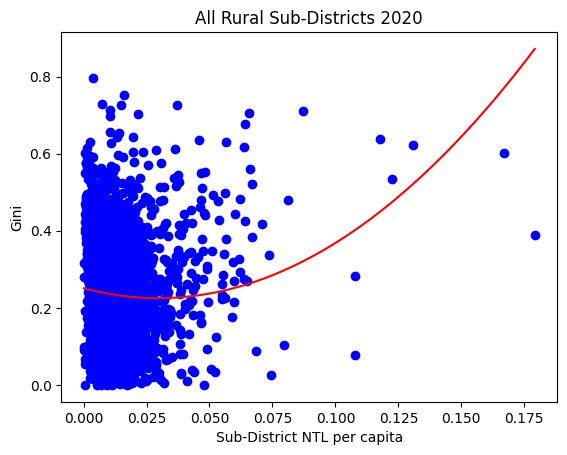

In [10]:
ale = ale2.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [23]:
panel_old = pd.merge(ale2, filter_sub, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


In [17]:
df20 = sub_sorted.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [18]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)

In [21]:
mer_cat_old = df20.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [24]:
panel_cat_old = pd.merge(panel_old, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old['no_1000s'] = panel_cat_old['subdist_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['subdist_edu_sum']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['subdist_transportadmin_sum']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['subdist_agro_sum']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['subdist_med_sum']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['mchc_per_1000']= panel_cat_old['availability_of_mother_child_health_facilities']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']
						


In [26]:
panel_cat_old.to_csv('/Users/sid/Desktop/2020catdata_towns.csv',index=False)

## Villages

In [11]:
mer_sub_v = vills.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','SubDistrict Area':'mean'}).reset_index()
mer_sub_v['avg_ntl'] = mer_sub_v['avg_ntl'].astype(float)
mer_sub_v = mer_sub_v.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road'})
mer_sub_v['subdist_ntl_pc'] = mer_sub_v['subdist_ntl']/mer_sub_v['subdist_population']
mer_all_sub_v = pd.merge(vills, mer_sub_v, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub_v['subdist_pop_share'] = mer_all_sub_v['total_population']/mer_all_sub_v['subdist_population']
mer_all_sub_v

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share
0,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116997,HALADIA,399612,Jhadeswarpur,754207.00000,286.00000,2316.00000,3365.00000,1714.00000,1651.00000,829.00000,700.00000,100.00000,0,0,0,0,101.40000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,405.00000,1,1,0,0,1,1,1,32.00000,3.00000,1,0,0,30.00000,0,0,0,0,0,1,0,12.00000,12.00000,6.00000,6.00000,12.00000,12.00000,0.00000,12.00000,6.00000,6.00000,21.00000,0,0,12.00000,12.00000,Balichandrapur,0.59326,3.24900,232.59300,11.00300,25.98400,7.99700,1,2,1,0,1,0,0.00772,2558.49300,185289.00000,519,343,287,161,226,232.59300,0.01381,0.01816
1,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,117013,PAIKARAPUR,399459,matiparilo,754204.00000,286.00000,2316.00000,697.00000,348.00000,349.00000,182.00000,142.00000,40.00000,0,0,0,0,29.38000,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,140.00000,1,1,0,0,1,1,1,25.00000,2.00000,1,1,1,130.00000,0,0,0,0,0,1,1,23.00000,23.00000,13.00000,13.00000,13.00000,3.00000,8.00000,0.00000,36.00000,36.00000,0.00000,0,0,36.00000,36.00000,Balichandrapur,6.01918,0.55100,232.59300,11.00300,7.17700,13.02200,1,4,1,0,2,0,0.01030,2558.49300,185289.00000,519,343,287,161,226,232.59300,0.01381,0.00376
2,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116995,GOPALPUR,399614,Nai

In [28]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub_v = mer_sub_v[columns_to_keep]
# filter_sub 

In [12]:
sub_sorted_v = mer_all_sub_v.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted_v['Index'] = sub_sorted_v.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted_v['Max_Len'] = sub_sorted_v.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [13]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale3 = sub_sorted_v.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale3.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

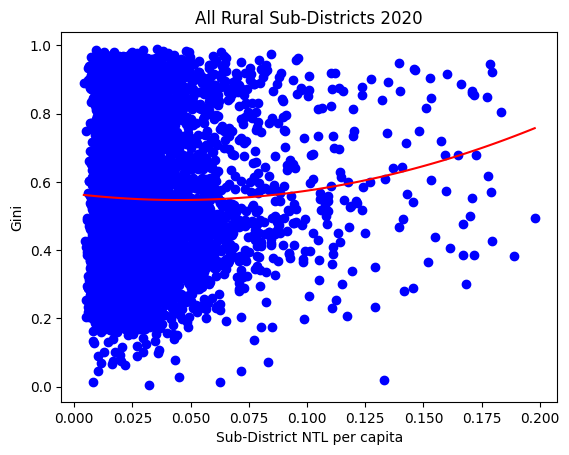

In [16]:
ale = ale3.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [30]:
panel_old_v = pd.merge(ale3, filter_sub_v, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


In [31]:
df21 = sub_sorted_v.copy()
df21['str'] = df21['total_primary_school_students']/df21['total_primary_school_teachers']

#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df21[df21['availability_of_primary_school'] < df21[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df21[selected_columns[1:]] = df21[selected_columns[1:]].where(
    df21[selected_columns[1:]].le(df21['availability_of_primary_school'], axis=0), 0
)

In [32]:
mer_cat_old_v = df21.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [33]:
panel_cat_old_v = pd.merge(panel_old_v, mer_cat_old_v, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_v['no_1000s'] = panel_cat_old_v['subdist_population']/1000

panel_cat_old_v['edu_per_1000']= panel_cat_old_v['subdist_edu_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['adm_per_1000']= panel_cat_old_v['subdist_transportadmin_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['arg_per_1000']= panel_cat_old_v['subdist_agro_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['no_1000_students'] = panel_cat_old_v['total_primary_school_students']/1000
panel_cat_old_v['primaryschool_per_100']= panel_cat_old_v['availability_of_primary_school']/panel_cat_old_v['no_1000_students']


panel_cat_old_v['children_bw_0_6']= panel_cat_old_v['total_male_child_age_bw_0_6'] + panel_cat_old_v['total_female_child_age_bw_0_6']
panel_cat_old_v['med_per_1000']= panel_cat_old_v['subdist_med_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['phc_per_1000']= panel_cat_old_v['availability_of_phc_chc']/panel_cat_old_v['no_1000s']
panel_cat_old_v['mchc_per_1000']= panel_cat_old_v['availability_of_mother_child_health_facilities']/panel_cat_old_v['no_1000s']
panel_cat_old_v['veter_per_1000'] = panel_cat_old_v['is_veterinary_hospital_available']/panel_cat_old_v['no_1000s']
panel_cat_old_v['no_100_kids'] = panel_cat_old_v['children_bw_0_6']/100
panel_cat_old_v['no_100_kids_reg'] = panel_cat_old_v['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_v['aanganwadi_per_100']= panel_cat_old_v['is_aanganwadi_centre_available']/panel_cat_old_v['no_100_kids']
panel_cat_old_v['aanganwadi_per_100_reg']= panel_cat_old_v['is_aanganwadi_centre_available']/panel_cat_old_v['no_100_kids_reg']

panel_cat_old_v['share_roads'] = panel_cat_old_v['is_village_connected_to_all_weather_road']/panel_cat_old_v['num']
panel_cat_old_v['share_rails'] = panel_cat_old_v['availability_of_railway_station']/panel_cat_old_v['num']
panel_cat_old_v['share_pubtn'] = panel_cat_old_v['availability_of_public_transport']/panel_cat_old_v['num']
panel_cat_old_v['ps_share_elec'] = panel_cat_old_v['is_primary_school_with_electricity']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_toil'] = panel_cat_old_v['primary_school_toilet']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_clab'] = panel_cat_old_v['is_primary_school_with_computer_lab']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_play'] = panel_cat_old_v['is_primary_school_with_playground']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_dwat'] = panel_cat_old_v['is_primary_school_have_drinking_water']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_meal'] = panel_cat_old_v['availability_of_mid_day_meal_scheme']/panel_cat_old_v['availability_of_primary_school']
						


In [34]:
panel_cat_old_v.to_csv('/Users/sid/Desktop/2020catdata_villages.csv',index=False)